# Project iFood CRM - Data Advanced Analytics Business Case

![Teste](https://www.cora.com.br/blog/wp-content/uploads/elementor/thumbs/Imagem-Ifood-red-1-pqpti8fbo93e9dbvljmi9hm48xg4073mrqaq7898cg.png)

iFood is the lead food delivery app in Brazil, present in over a thousand cities.
Keeping a high customer engagement is key for growing and consolidating the company’s
position as the market leader.

Data Analysts working within the data team are constantly challenged to provide insights and
value to the company through open scope projects. This case intends to simulate that.
In this case, you are presented a sample dataset, that mocks metainformation on the customer
and on iFood campaign interactions with that customer.

It is your challenge to understand the data, find business opportunities & insights and to propose
any data driven action to optimize the campaigns results & generate value to the company.
This case aims to evaluate your Data skills and knowledge for two possible roles:

- Data Analyst Business:
    - Perform robust exploratory analysis, rich with business insights & data driven proposals
to add value to the company and have strong communication skills to influence the
decision making
- Data Advanced Analytics
    - Perform robust exploratory analysis, using advanced analytics tools and statistical
methods to generate data products to optimize business results (predictive & clustering
models, for example)


### About the dataset
The data set contains socio-demographic and firmographic features about 2.240 customers who
were contacted. Additionally, it contains a flag for those customers who responded the campaign,
by buying the product

### Goals of the Project

- Explore the data - you need to provide the marketing team a better understanding of the characteristics features of respodents;
- At least 3 important insights;
- Model a customer segmentation that can increase the campaign profit;
- Create a predictive model to maximize the profit of the next marketing campaign;
- Power Point to present the results.

### Deliverable
- Storytelling of Insights.
- Model that can be used by the business and marketing team.

### Data Source
https://github.com/ifood/ifood-data-business-analyst-test

### Solution Planning

Since the business case is composed by 3 parts, I will split the problem in 3 different notebooks to be well organized and structured. The goal of the data analysis notebook will be analyze the provided dataset and understand the data. Also,  it is necessary to create some hypothesis, validate it using exploratory data analysis and extract some actionable insights. The second part is using some methods to create cluster of clients according to the profile and use it to create some recommendations for the marketing campaign. It should increase the profit, since we are aiming specific clients. The last part will be the predictive model, joining the results generated by the clustering modelization, we can predict if the client will accept the next offer and then calculate the business impact based on the inputs of the dataset.

#### 1. Planning of Data Analysis [DONE]
- Business understanding and context
- Describe Data
- Hypothesis Creation
- Feature Engineering
- Filtering Variables
- Exploratory Data Analysis

#### 2. Planning of Clustering
- Data Preparation
- Feature Selection
- Modeling Cluster
- Cluster Analysis
- Recommendations


#### 3. Planning of Predictive Model
- Data Preparation
- Feature Selection
- Machine Learning Modeling
- Hyper parameters Fine-Tunning
- Evaluation
- Business Impact


### Data Dictionary

![Data](images/metadata-table.PNG)

## Clustering

## 0.0 Imports

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from feature_engine import imputation
from feature_engine import encoding
from imblearn import FunctionSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn import pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

### 1.0 Loading Data

In [2]:
df0 = pd.read_csv('../data/ml_project1_data.csv')

### 1.1 Rename Columns

In [3]:
old_columns = ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
               'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
               'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
               'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
               'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
               'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
               'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

lower_case = lambda x: x.lower()

new_columns = list(map(lower_case, old_columns))

df0.columns = new_columns

In [4]:
df0.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


### 2.0 Missing Values

In [5]:
(df0.isna().sum() / len(df0))*100

id                     0.000000
year_birth             0.000000
education              0.000000
marital_status         0.000000
income                 1.071429
kidhome                0.000000
teenhome               0.000000
dt_customer            0.000000
recency                0.000000
mntwines               0.000000
mntfruits              0.000000
mntmeatproducts        0.000000
mntfishproducts        0.000000
mntsweetproducts       0.000000
mntgoldprods           0.000000
numdealspurchases      0.000000
numwebpurchases        0.000000
numcatalogpurchases    0.000000
numstorepurchases      0.000000
numwebvisitsmonth      0.000000
acceptedcmp3           0.000000
acceptedcmp4           0.000000
acceptedcmp5           0.000000
acceptedcmp1           0.000000
acceptedcmp2           0.000000
complain               0.000000
z_costcontact          0.000000
z_revenue              0.000000
response               0.000000
dtype: float64

Income has around 1% with NaN values. We need to replace this in the future.

### 2.1 Data Types

In [6]:
df0.dtypes

id                       int64
year_birth               int64
education               object
marital_status          object
income                 float64
kidhome                  int64
teenhome                 int64
dt_customer             object
recency                  int64
mntwines                 int64
mntfruits                int64
mntmeatproducts          int64
mntfishproducts          int64
mntsweetproducts         int64
mntgoldprods             int64
numdealspurchases        int64
numwebpurchases          int64
numcatalogpurchases      int64
numstorepurchases        int64
numwebvisitsmonth        int64
acceptedcmp3             int64
acceptedcmp4             int64
acceptedcmp5             int64
acceptedcmp1             int64
acceptedcmp2             int64
complain                 int64
z_costcontact            int64
z_revenue                int64
response                 int64
dtype: object

In [7]:
df0['dt_customer'] = pd.to_datetime(df0['dt_customer'])

Only dt_customer was wrong, then we changed it to datetime even if we are not using now.

All the others statistics and exploratory analysis are in the crm_ifood_data_analysis.ipynb.

### 2.2 Checking Outliers and Treating Outliers

Since we are clustering data, it is important to check the outliers for the different variables that we have. Most of the clustering methods are distance based, then the outliers can impact our analysis.

To do this task, I chose the boxplot method to identify the columns and the z-score method to treat them, which consists in calculate the score for each column and if it is 3 std deviation, it will be eliminated or replaced.

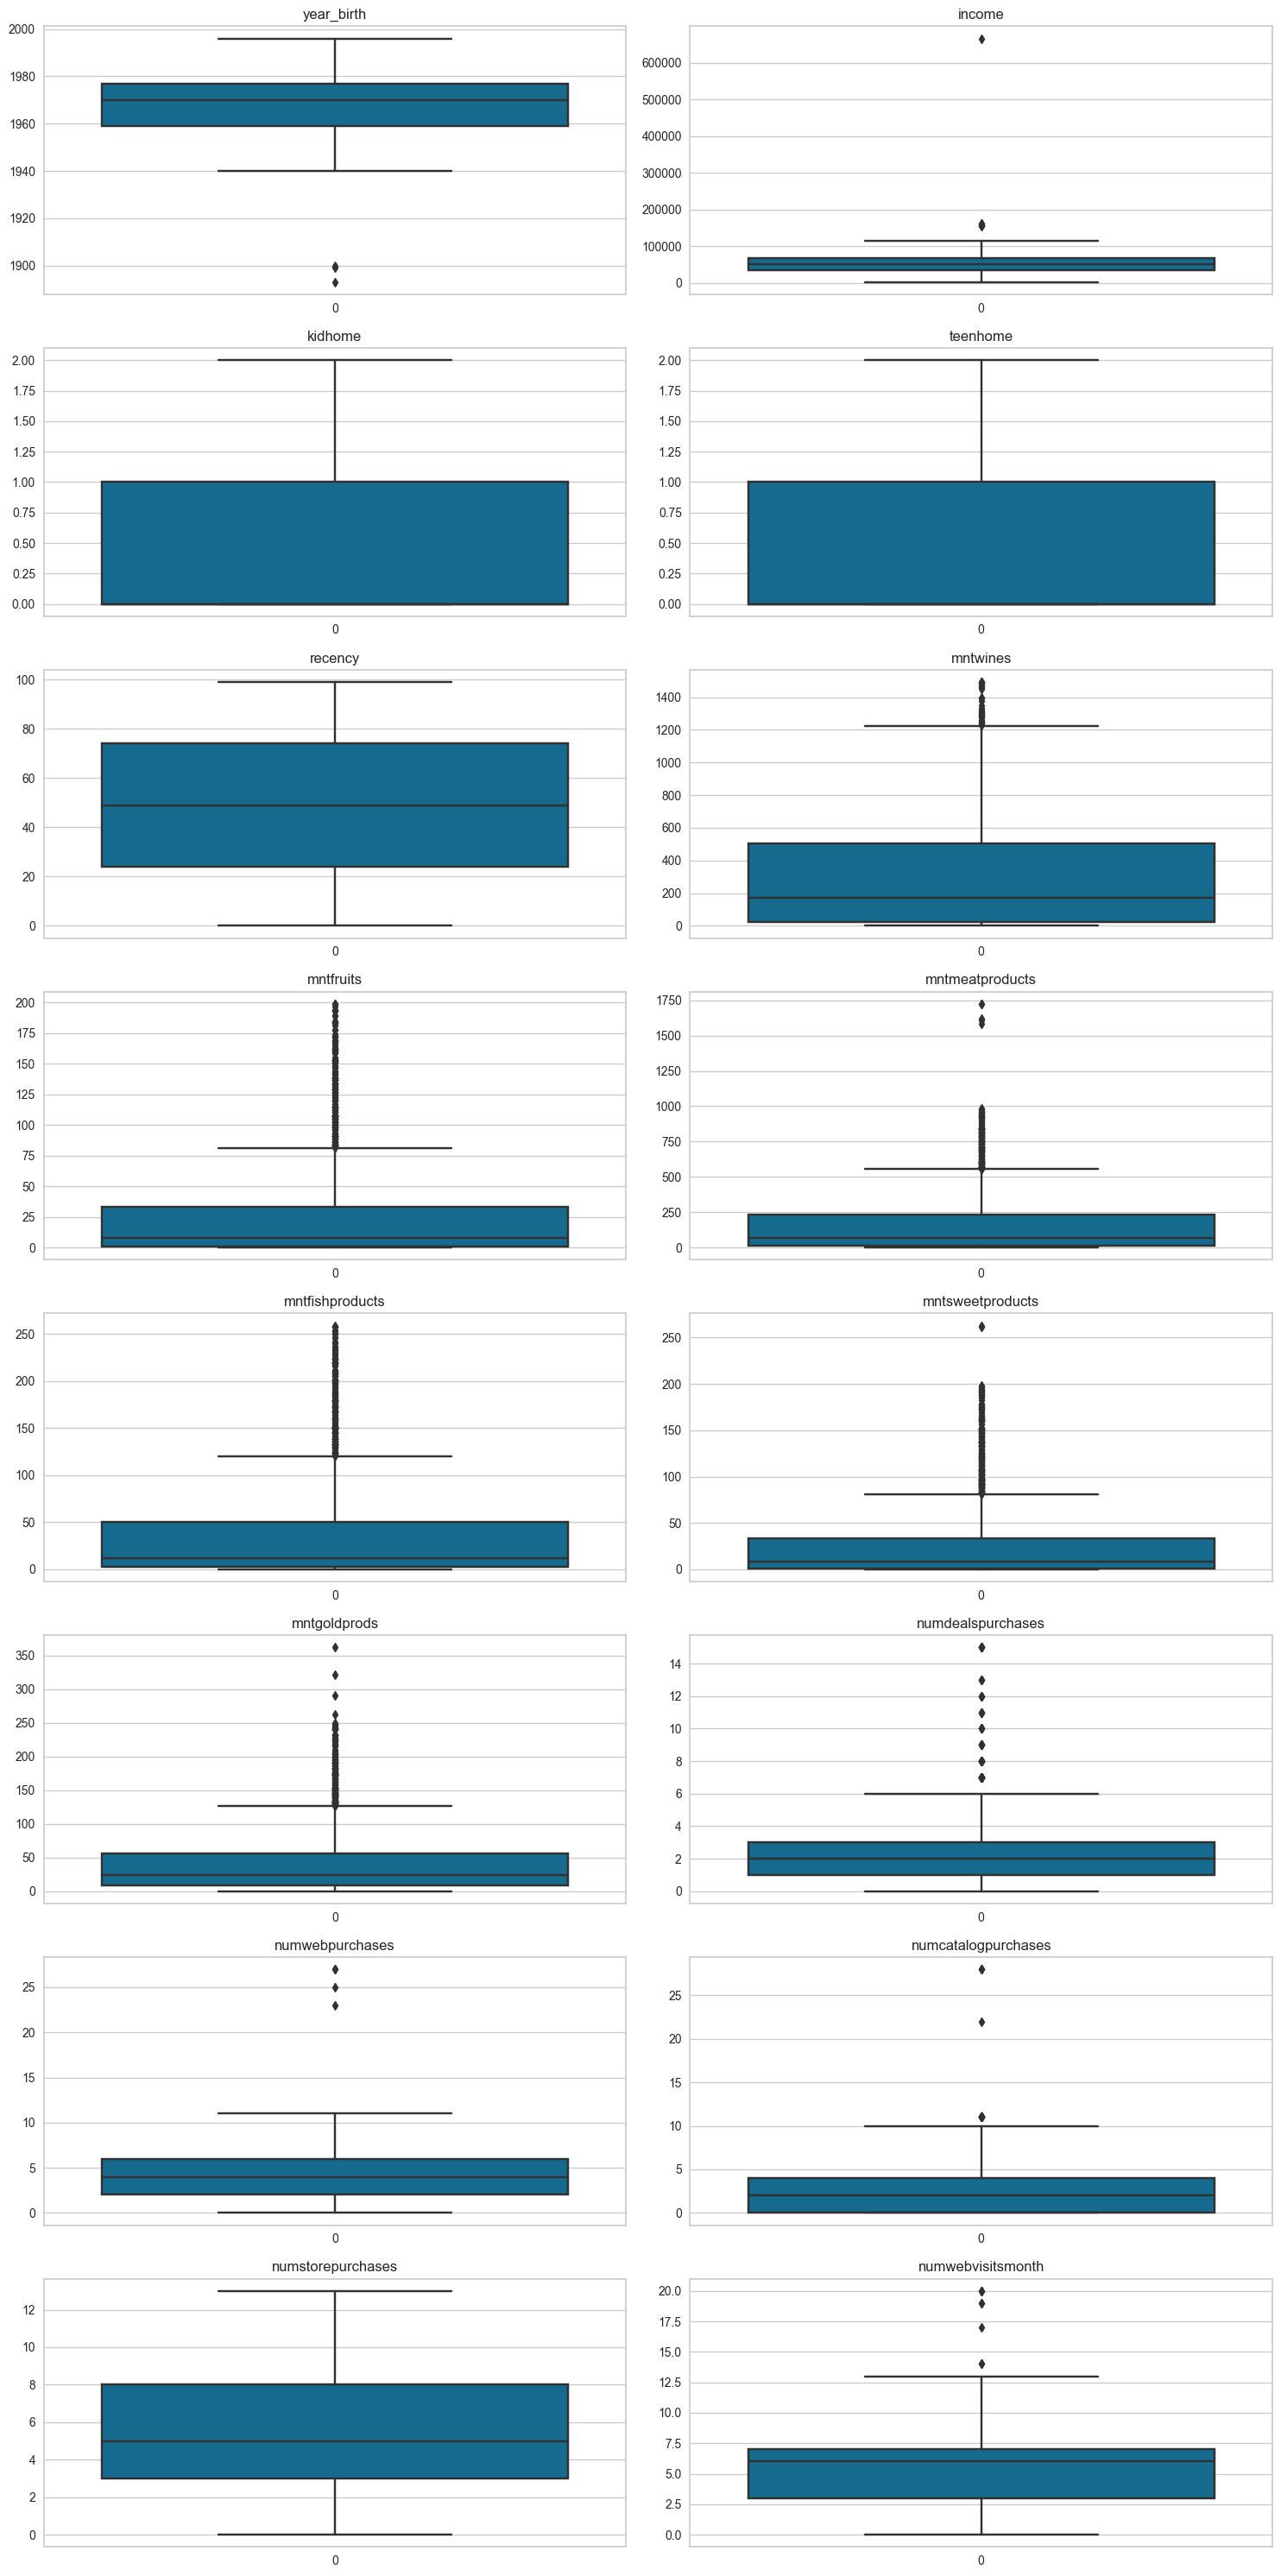

In [8]:
cols_to_check = ['year_birth','income','kidhome','teenhome','recency', 'mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods', 'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth']

plt.figure(1, figsize = (15,30))
for i,col in enumerate(cols_to_check):
    plt.subplot(8, 2, i+1)
    sns.boxplot(df0[col])
    plt.title(col)
    plt.tight_layout()
    

It's possible to see that that numstorepurchases, recency, kidhome and teenhome there are no outliers. The other columns must be treated.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
def outlier_capping(X, variables):
    for col in variables:
        upper_limit = X[col].mean() + 2*X[col].std()
        lower_limit = X[col].mean() - 2*X[col].std()

        X[col] = np.where(X[col]>upper_limit, upper_limit, np.where( X[col]<lower_limit, lower_limit, X[col]))

    return X



In [11]:
df1 = df0.copy()

# Columns to be treated in the pre-processing part
cols_to_treat = ['year_birth','income', 'mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods', 'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases', 'numwebvisitsmonth']
df1 = outlier_capping(df1, cols_to_treat)

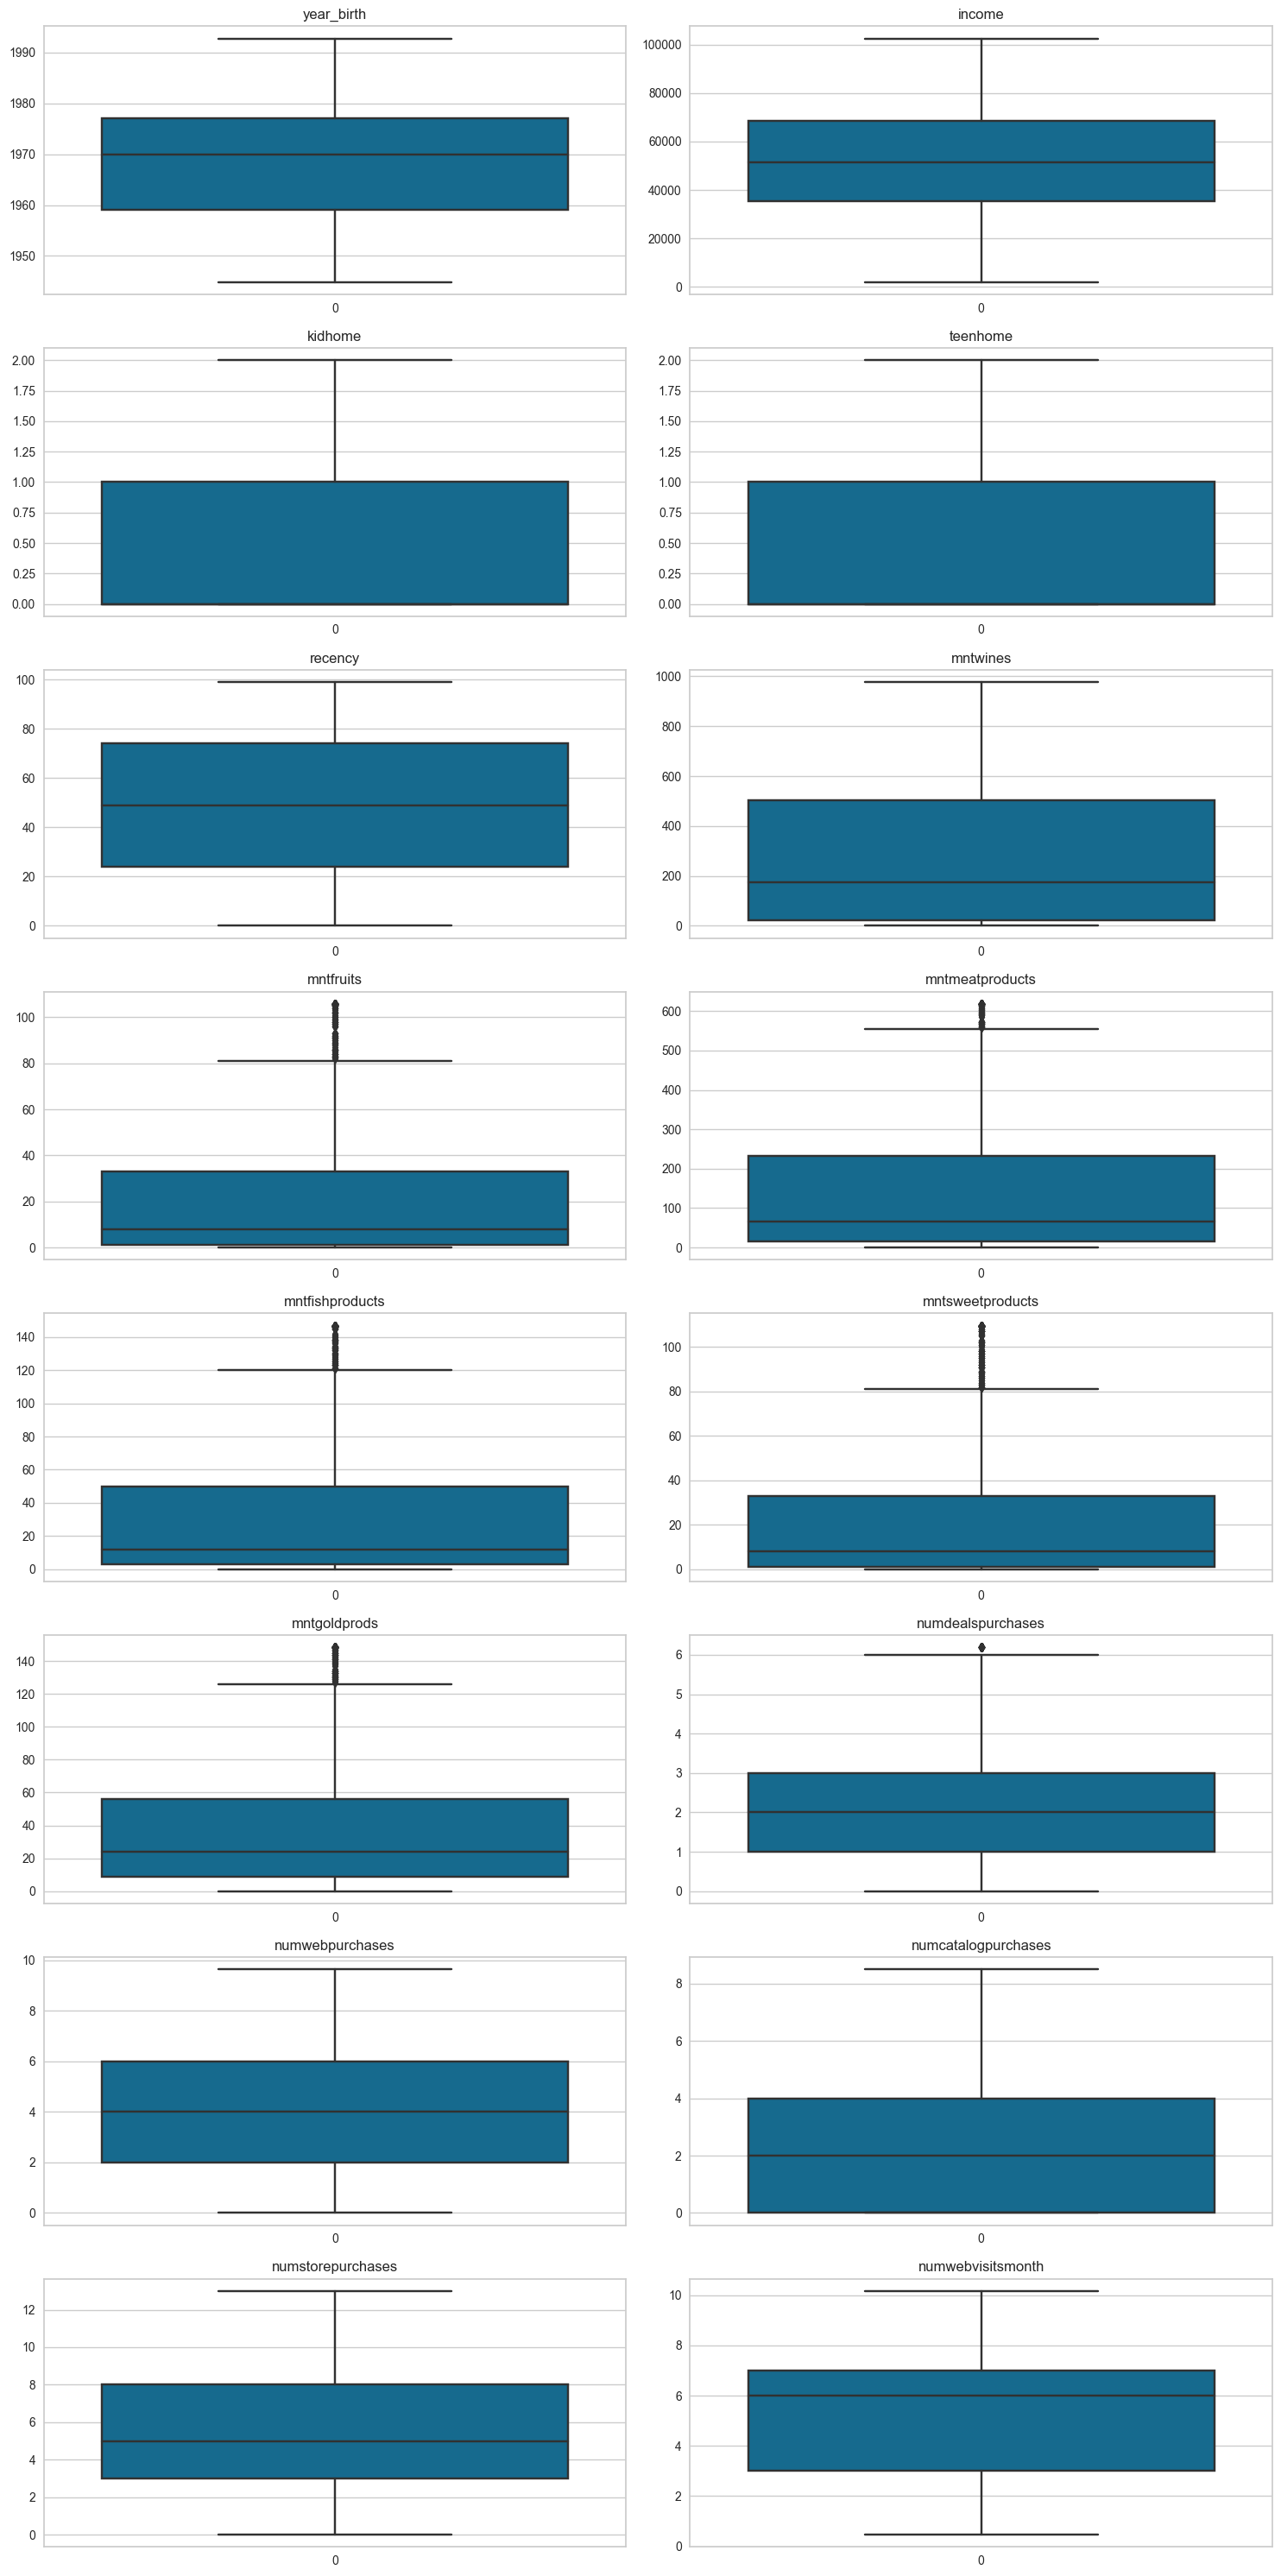

In [12]:
cols_to_check = ['year_birth','income','kidhome','teenhome','recency', 'mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods', 'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth']

plt.figure(1, figsize = (15,30))
for i,col in enumerate(cols_to_check):
    plt.subplot(8, 2, i+1)
    sns.boxplot(df1[col])
    plt.title(col)
    plt.tight_layout()
    

Now it seems better. In this first moment, I'll use these values and if we check that there is any problem, we can change the cut-off to have less outliers.

### 3.0 Feature Engineering 

In [13]:
df2 = df1.copy()

In [14]:
# Creating the loyalty variable - days
df2['loyalty_days'] = df2['dt_customer'].max() - df2['dt_customer']
df2['loyalty_days'] = df2['loyalty_days'] //  np.timedelta64(1, 'D')

# Creating the loyalty variable - convert to month
df2['loyalty_months'] = df2['loyalty_days'] / 30

In [15]:
# Creating the total amount spent by each customer - MONETARY
df2['amount_spent'] = df2['mntmeatproducts'] + df2['mntwines'] + df2['mntfruits'] + df2['mntsweetproducts'] + df2['mntfishproducts']
# Creating the amount spent per month 
df2['amount_spent_month'] = df2.apply(lambda x:  x['amount_spent'] / x['loyalty_months'] if x['loyalty_months'] > 1 else x['amount_spent'], axis = 1)

In [16]:
# Creating the total number of purchases - FREQUENCY
df2['total_purchases'] = df2['numdealspurchases'] + df2['numwebpurchases'] + df2['numcatalogpurchases'] + df2['numstorepurchases']

In [17]:
df2['accepted_campaigns'] = df2['acceptedcmp1'] + df2['acceptedcmp2'] + df2['acceptedcmp3'] + df2['acceptedcmp4'] + df2['acceptedcmp5'] + df2['response']

In [18]:
# Create the age of the customer
df2['age'] = df2['dt_customer'].dt.year.max() - df2['year_birth']

In [19]:
# Creating the total number of purchasese by each month
df2['purchases_month'] = df2['total_purchases'] / (df2['loyalty_months'] + 1)

In [20]:
# Creating percentage spent on different products
df2['percentage_spent_wines'] = df2['mntwines'] / df2['amount_spent']
df2['percentage_spent_fruits'] = df2['mntfruits'] / df2['amount_spent']
df2['percentage_spent_meat'] = df2['mntmeatproducts'] / df2['amount_spent']
df2['percentage_spent_fish'] = df2['mntfishproducts'] / df2['amount_spent']
df2['percentage_spent_sweet'] = df2['mntsweetproducts'] / df2['amount_spent']
df2['percentage_spent_gold'] = df2['mntgoldprods'] / df2['amount_spent']

In [21]:
# Creating percentage purchases on different channel types
df2['percentage_type_deals'] = df2['numdealspurchases'] / df2['total_purchases']
df2['percentage_type_web'] = df2['numwebpurchases'] / df2['total_purchases']
df2['percentage_type_catalog'] = df2['numcatalogpurchases'] / df2['total_purchases']
df2['percentage_type_store'] = df2['numstorepurchases'] / df2['total_purchases']

### 4.0 Pre-processing Clustering

In [22]:
df3 = df2.copy()

In [23]:

df3_processed = df3.copy()
for col in ['percentage_type_deals', 'percentage_type_web', 'percentage_type_catalog', 'percentage_type_store', 'percentage_spent_wines', 'percentage_spent_fruits', 'percentage_spent_meat', 'percentage_spent_fish', 'percentage_spent_sweet','percentage_spent_gold']:
    df3_processed = df3_processed[df3_processed[col] < 1] 



In [27]:
mms = MinMaxScaler()

# Scale the data by MinMax Scaling
df3_scaled = mms.fit_transform(df3_processed.select_dtypes(include = ['float64', 'int64']))

In [28]:
df3_scaled = pd.DataFrame(df3_scaled, columns = df3_processed.select_dtypes(include = ['float64', 'int64']).columns)

### 5.0 Clustering

#### 5.1 Clustering Products

In [29]:
# Select categories for produts
categories_prod = [ 'percentage_spent_wines', 'percentage_spent_fruits', 'percentage_spent_meat', 'percentage_spent_fish', 'percentage_spent_sweet','percentage_spent_gold']

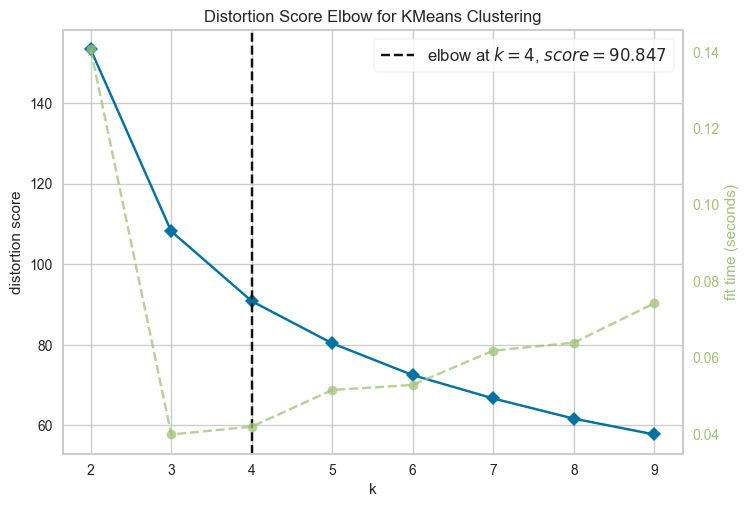

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(df3_processed[categories_prod])        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Based on the Elbow Method, we choose 4 groups to cluster our data.

In [31]:
kmeans_prod = KMeans(n_clusters=4, random_state=0, init='k-means++').fit(df3_processed[categories_prod])
cluster_id_prod = kmeans_prod.labels_

In [32]:
df3_processed['cluster_id_prod'] = cluster_id_prod

In [34]:
import sklearn

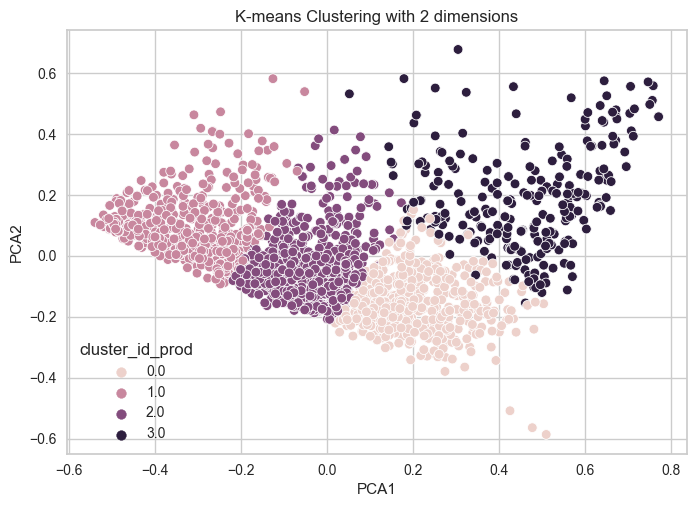

In [35]:
pca_num_components = 2

reduced_data = sklearn.decomposition.PCA(n_components=pca_num_components).fit_transform(df3[categories_prod])
results = pd.DataFrame(reduced_data,columns=['PCA1','PCA2'])

sns.scatterplot(x="PCA1", y="PCA2", hue=df3_processed['cluster_id_prod'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

<AxesSubplot: ylabel='cluster_id_prod'>

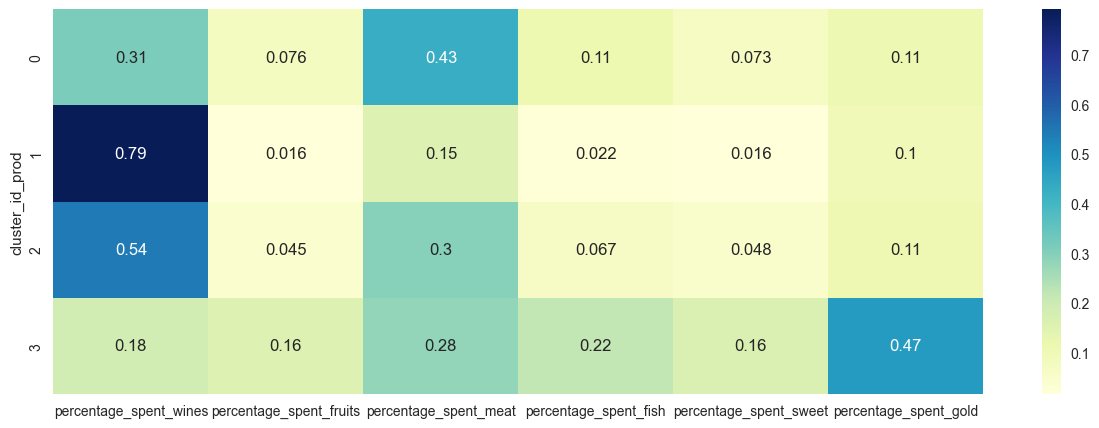

In [113]:
plt.figure(1, figsize = (15, 5))
sns.heatmap(df3_processed.groupby('cluster_id_prod')[categories_prod].mean(), cmap = 'YlGnBu', annot = True)

Based on the clustering analysis, it is possible to see 4 different groups defined by KMeans. Through the heatmap, we extract the customers and their likelihood according to the products:

- Cluster 0 - Wine and Meat Consumers 
- Cluster 1 and 2 - Wine Consumers 
- Cluster 3 - Gold Consumers 

Now, we segemented our data based on customer's preferences and we named them as the cluster's name above. This can help the marketing team to identify the best offers and increase the efficiency of the campaign with the correct products.

#### 5.2 Clustering Channels

In [87]:
categories_channel = ['percentage_type_deals', 'percentage_type_web', 'percentage_type_catalog', 'percentage_type_store']

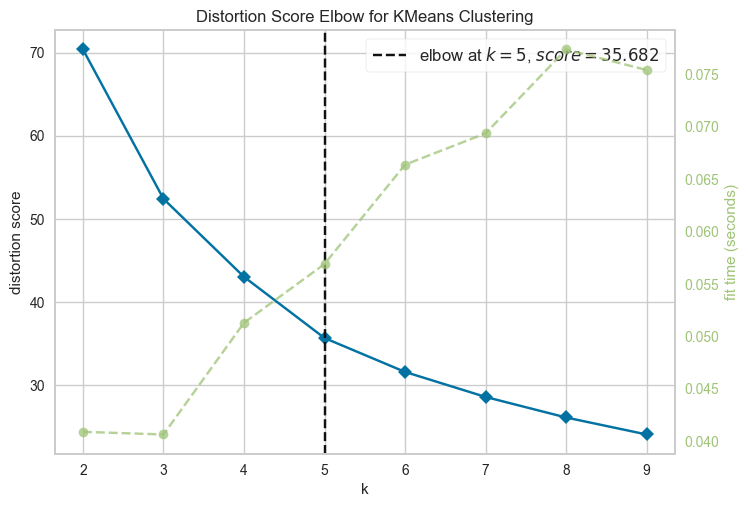

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [88]:
# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(df3_processed[categories_channel])        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Based on the Elbow Method, we should choose 5, but we are choosing 4 to do not extended that much the number of combinations later.

In [100]:
kmeans_channel = KMeans(n_clusters=4, random_state=0, init='k-means++').fit(df3_processed[categories_channel])
cluster_id_channel = kmeans_channel.labels_

In [101]:
df3_processed['cluster_id_channel'] = cluster_id_channel

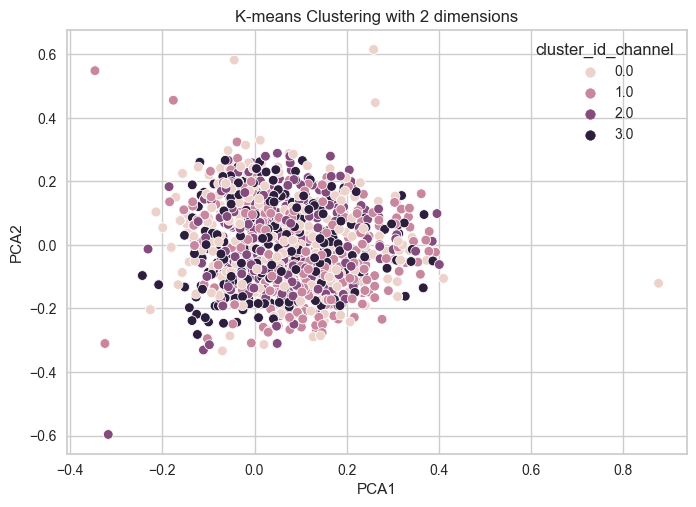

In [102]:
pca_num_components = 2

reduced_data = sklearn.decomposition.PCA(n_components=pca_num_components).fit_transform(df3[categories_channel].dropna())
results = pd.DataFrame(reduced_data,columns=['PCA1','PCA2'])

sns.scatterplot(x="PCA1", y="PCA2", hue=df3_processed['cluster_id_channel'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

<AxesSubplot: ylabel='cluster_id_channel'>

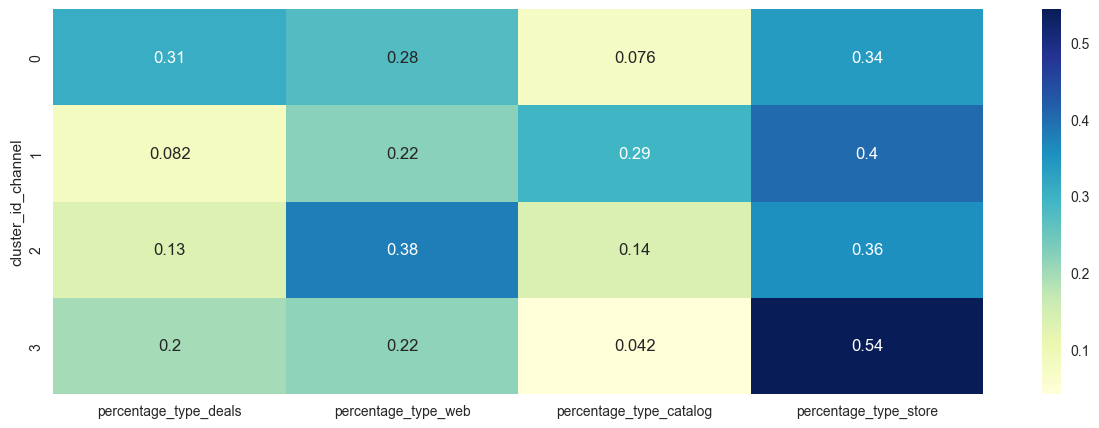

In [104]:
plt.figure(1, figsize = (15, 5))
sns.heatmap(df3_processed.groupby('cluster_id_channel')[categories_channel].mean(), cmap = 'YlGnBu', annot = True)

Despite the Elbow Method has indicated 4 clusters, after analyzing them via PCA visualization, it's not possible clearly see in 2 dimensions the clustering. Then, we use the heatmap to better understand the customer behavior:
- Cluster 0: they prefer deals, web and store 
- Cluster 1: they prefer catalog and store 
- Cluster 2: they prefer web and store 
- Cluster 3: they prefer the store channel 

#### 5.3 Clustering RFM (Recency, Frequency, Monetary)

In [105]:
rfm_variables = ['recency', 'total_purchases', 'amount_spent']

In [106]:
mms = sklearn.preprocessing.MinMaxScaler()

# Scale the data by MinMax Scaling
df_rfm_scaled = pd.DataFrame(mms.fit_transform(df3_processed[rfm_variables]), columns = rfm_variables)

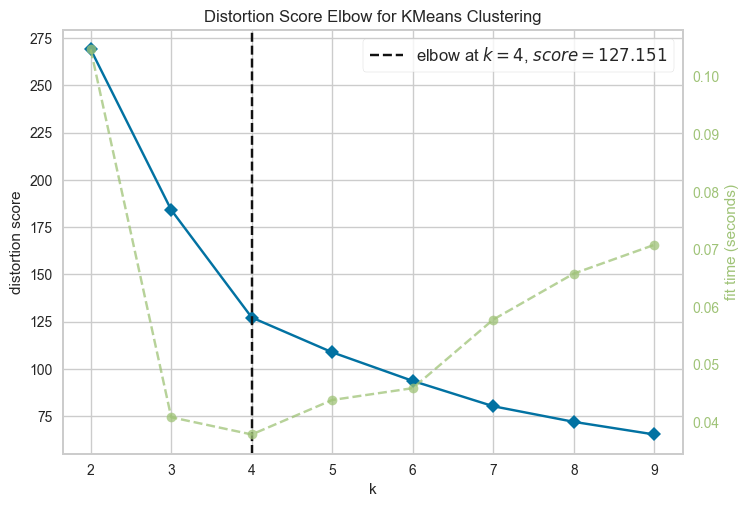

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [107]:
# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(df_rfm_scaled[rfm_variables])        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Since the optimal number of cluster using the Elbow Method is 4, let's use it to create the cluster according the behavior of each cluster!

In [108]:
kmeans_rfm = KMeans(n_clusters=4, random_state=0, init='k-means++').fit(df_rfm_scaled[rfm_variables])
cluster_id_rfm = kmeans_rfm.labels_


In [109]:
df_rfm_scaled['cluster_id_rfm'] = cluster_id_rfm
df3_processed['cluster_id_rfm'] = cluster_id_rfm

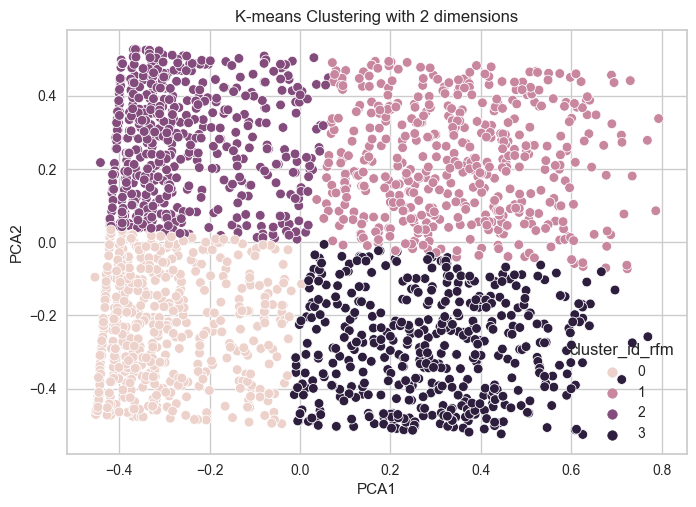

In [110]:
pca_num_components = 2

reduced_data = sklearn.decomposition.PCA(n_components=pca_num_components).fit_transform(df_rfm_scaled[rfm_variables])
results = pd.DataFrame(reduced_data,columns=['PCA1','PCA2'])

sns.scatterplot(x="PCA1", y="PCA2", hue=df_rfm_scaled['cluster_id_rfm'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

<AxesSubplot: ylabel='cluster_id_rfm'>

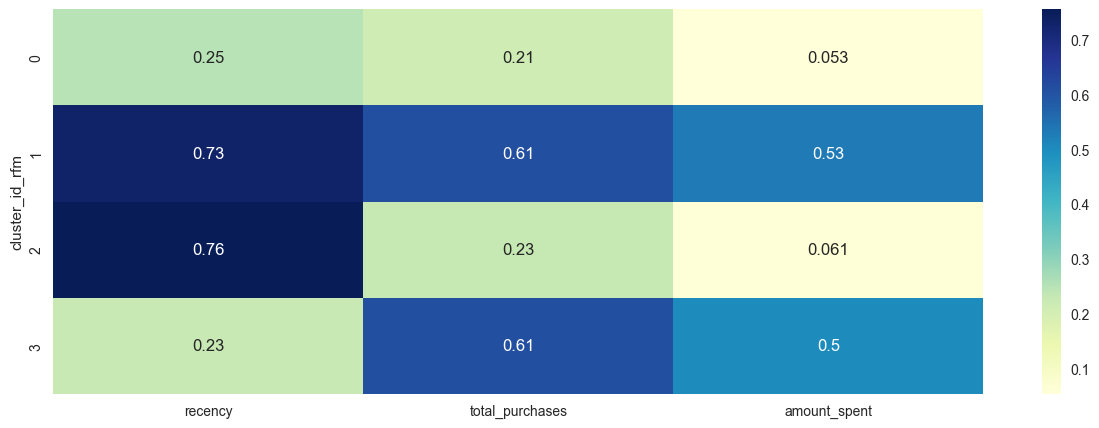

In [112]:
plt.figure(1, figsize = (15, 5))
sns.heatmap(df_rfm_scaled.groupby('cluster_id_rfm')[rfm_variables].mean(), cmap = 'YlGnBu', annot = True)

For this analysis, I decided to normalize the avg values of the cluster by the maximum of each column, since they have different scales. Then, we have:
- Cluster 0: Didn't buy recently, don't buy many times and don't spend a lot of money. (Lost Cluster)
- Cluster 1: Bought recently, buy many times and spend considerably some money. (Champions Cluster)
- Cluster 2: Bought recently, don't buy many times and don't spend a lot of money (Promising Cluster)
- Cluster 3: Didn't buy recently, buy many times and spend considerably some money (Hibernating)

Now we have all the clusters that we need, let's join them and create a combined cluster to find people that like some product, buy from a specific channel and it's a champion customer. Based on this strategy, we can focus on the right people, sending to them the right offer!

In [114]:
df3_processed['cluster_id_all'] = df3_processed['cluster_id_prod'].astype(str) + '_' + df3_processed['cluster_id_channel'].astype(str) + '_' + df3_processed['cluster_id_rfm'].astype(str)

For example, for ID 5324, we can see that this customer there is no preference regarding the products, but he almost don't buy from catalog (this should be avoided) and it's a promising client. With this insight, we can send to the marketing team to take the best action for this person. But, is not possible also to understand his behavior and know what is missing to him to become a Champion? Yes, it's completely possible and we can do this with some machine learning approaches.

### 6.0 Clustering Based on ML

In [115]:
# Copy the dataframe
df4 = df3_processed.copy()

#### 6.1 Split Dataset

In [116]:
# Define the features of the model
features = [  'education', 'marital_status', 'income', 'kidhome',
              'teenhome', 'recency', 'percentage_spent_wines', 'percentage_spent_fruits',
              'percentage_spent_meat', 'percentage_spent_fish', 'percentage_spent_sweet',
              'percentage_spent_gold', 'percentage_type_deals', 'percentage_type_web',
              'percentage_type_catalog', 'percentage_type_store', 'numwebvisitsmonth',
              'complain', 'loyalty_days', 'amount_spent', 'amount_spent_month',
              'total_purchases', 'accepted_campaigns', 'age', 'purchases_month']

# Define the target
target = ['cluster_id_all']

X_train, X_test, y_train, y_test = train_test_split(df4[['id'] + features], df4[target], test_size = 0.3, random_state = 42)

In [117]:
# Save the ids for further analysis
id_train = X_train['id']
id_test = X_test['id']


# Drop the ID
X_train = X_train.drop('id', axis = 1)
X_test = X_test.drop('id', axis = 1)

In [118]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (1555, 25)
y_train: (1555, 1)
X_test: (667, 25)
y_test: (667, 1)


#### 6.2 Pre-processing

To try to understand the pattern of each customer for the cluster, I'll use a Random Forest Classifier. This method can handle a lot of problems that usually others algorithms can't, such as scaling of variables. However, when we talk about categorical features, One Hot Encoding is not the best option because it can create sparsity and high dimensional data, which is not good for the tree. In this case, I'll use OHE only for marital_status and for education I'll use Ordinal Encoding, then we can be sure that we are not increasing that much the sparsity.

In [119]:
# One Hot Encoding
ohe_features = 'marital_status'
onehot = encoding.OneHotEncoder(drop_last=True, variables = ohe_features)

# Ordinal Encoding
ordinal_features = 'education'
ord = encoding.OrdinalEncoder(encoding_method='ordered', variables = ordinal_features)


# Imputation of Income
imput_features = 'income'
imput_income = imputation.MeanMedianImputer(variables = imput_features)





#### 6.3 Modeling

In [120]:
# Fit the Model
rf = RandomForestClassifier(n_estimators = 100, class_weight='balanced_subsample')

# Data Pipeline
model_pipe = pipeline.Pipeline( steps = [('Mean Imputation', imput_income),
                                        ('OHE', onehot),
                                        ('Ordinal', ord),
                                        ('RF Model', rf)])

# Training
model_pipe.fit(X_train, y_train)

C:\Users\BRUM\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BRUM\AppData\Roaming\Python\Python310\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('Mean Imputation', MeanMedianImputer(variables='income')),
                ('OHE',
                 OneHotEncoder(drop_last=True, variables='marital_status')),
                ('Ordinal', OrdinalEncoder(variables='education')),
                ('RF Model',
                 RandomForestClassifier(class_weight='balanced_subsample'))])

Text(0, 0.5, 'Feature')

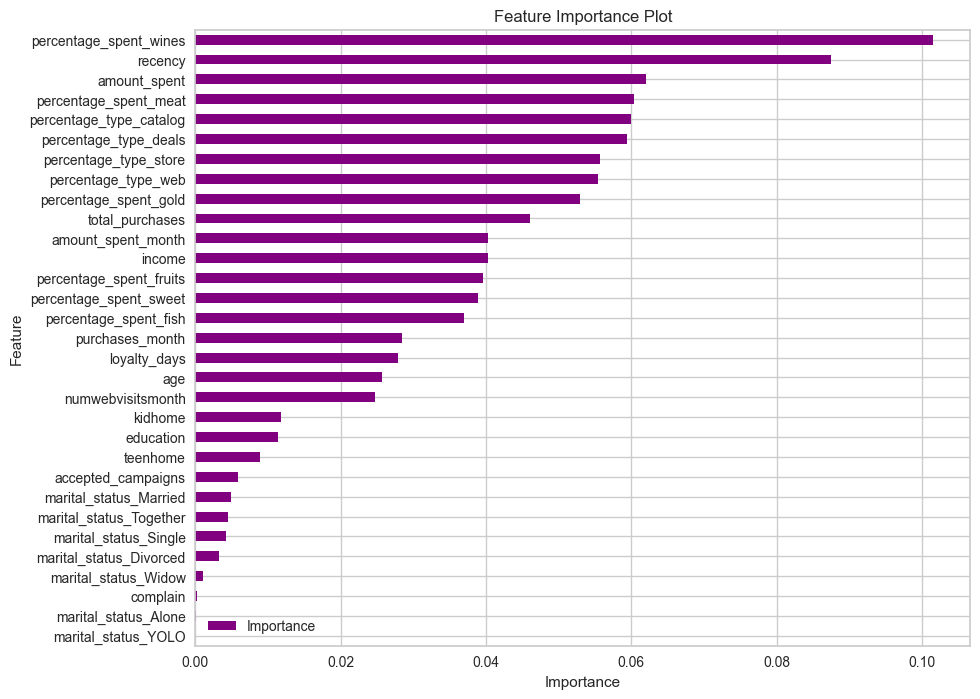

In [121]:
# Get the feature importance values
importances = model_pipe[-1].feature_importances_

# Get the feature names
features = model_pipe[:-2].fit_transform(X_train).columns

# Create a dataframe to store the feature importance values
df_feat_imp = pd.DataFrame(importances, index=features, columns=['Importance'])

# Sort the dataframe by importance
df_feat_imp.sort_values(by='Importance', ascending=True, inplace=True)

# Plot the feature importance values as a horizontal bar plot
df_feat_imp.plot(kind='barh', figsize=(10, 8), color='purple')
plt.title("Feature Importance Plot")
plt.xlabel("Importance")
plt.ylabel("Feature")


In [122]:
# Preditiction on training
y_pred_train = model_pipe.predict(X_train)
y_pred_prob_train = model_pipe.predict_proba(X_train)

# Prediction on test
y_pred_test = model_pipe.predict(X_test)
y_pred_prob_test = model_pipe.predict_proba(X_test)

In [123]:
print("Accuracy for the training: ", accuracy_score(y_train, y_pred_train))
print("Accuracy for the test: ", accuracy_score(y_test, y_pred_test))

print("F1-Score for the training: ", f1_score(y_train, y_pred_train, average = 'weighted'))
print("F1-Score for the test: ", f1_score(y_test, y_pred_test, average = 'weighted'))

Accuracy for the training:  1.0
Accuracy for the test:  0.848575712143928
F1-Score for the training:  1.0
F1-Score for the test:  0.8401119317611832


### 6.4 Hyper-parameter Fine Tunning 

In [124]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90],
    'max_features': [2, 5],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [3, 5],
    'n_estimators': [100, 200, 300]
}

In [125]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, scoring = 'f1_weighted', verbose = 2)



# Data Pipeline
model_grid = pipeline.Pipeline( steps = [('Mean Imputation', imput_income),
                                        ('OHE', onehot),
                                        ('Ordinal', ord),
                                        ('Grid Search', grid_search)])

# Training
model_grid.fit(X_train, y_train)
                      

C:\Users\BRUM\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BRUM\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Fitting 3 folds for each of 48 candidates, totalling 144 fits


C:\Users\BRUM\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Pipeline(steps=[('Mean Imputation', MeanMedianImputer(variables='income')),
                ('OHE',
                 OneHotEncoder(drop_last=True, variables='marital_status')),
                ('Ordinal', OrdinalEncoder(variables='education')),
                ('Grid Search',
                 GridSearchCV(cv=3,
                              estimator=RandomForestClassifier(class_weight='balanced_subsample'),
                              n_jobs=-1,
                              param_grid={'bootstrap': [True],
                                          'max_depth': [80, 90],
                                          'max_features': [2, 5],
                                          'min_samples_leaf': [3, 5],
                                          'min_samples_split': [3, 5],
                                          'n_estimators': [100, 200, 300]},
                              scoring='f1_weighted', verbose=2))])

In [126]:
model_grid[-1].best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 200}

In [127]:
grid_search.best_score_

0.8608553539041641

In [137]:
# Fit the Model
rf_tunned = RandomForestClassifier(bootstrap = True,
                            max_depth = 80,
                            max_features = 5,
                            min_samples_leaf = 5,
                            min_samples_split = 5,
                            n_estimators = 200, 
                            class_weight='balanced_subsample')


# Data Pipeline
model_pipe = pipeline.Pipeline( steps = [('Mean Imputation', imput_income),
                                        ('OHE', onehot),
                                        ('Ordinal', ord),
                                        ('Feature Selection', SelectKBest(mutual_info_classif, k=15)),
                                        ('RF Model', rf_tunned)])

# Fit
model_pipe.fit(X_train, y_train)

C:\Users\BRUM\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BRUM\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BRUM\AppData\Roaming\Python\Python310\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('Mean Imputation', MeanMedianImputer(variables='income')),
                ('OHE',
                 OneHotEncoder(drop_last=True, variables='marital_status')),
                ('Ordinal', OrdinalEncoder(variables='education')),
                ('Feature Selection',
                 SelectKBest(k=15,
                             score_func=<function mutual_info_classif at 0x0000026352940D30>)),
                ('RF Model',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_depth=80, max_features=5,
                                        min_samples_leaf=5, min_samples_split=5,
                                        n_estimators=200))])

In [138]:
# Prediction on test
y_pred_test = model_pipe.predict(X_test)
y_pred_prob_test = model_pipe.predict_proba(X_test)

In [139]:
print("F1-score for the training: ", f1_score(y_train, y_pred_train, average = 'weighted'))
print("F1-score for the test: ", f1_score(y_test, y_pred_test, average = 'weighted'))

F1-score for the training:  1.0
F1-score for the test:  0.8532248761051286


In [140]:
# Evaluate the performance using cross-validation
cv_score = cross_val_score(model_pipe, X_train, y_train, cv=3, scoring = 'f1_weighted', verbose = 0)
print('F1-score after CV: ', np.mean(cv_score))

C:\Users\BRUM\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\BRUM\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BRUM\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BRUM\AppData\Roaming\Python\Python310\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for ex

F1-score after CV:  0.8483642607368732


Well, the real model validation got an F1-score of 84%, which is quite good and this can be improved with more data examples for the classes in the future. We accept this!

### 7.0 Creating Insights With the Model

In [141]:
# Organise the classes by the highest probability
def create_order(prob, classes, k = 5):
    list_probs = list(zip(prob, classes))
    
    list_probs.sort(key = lambda x: x[0], reverse = True)

    return [element[1] for element in list_probs[:k]]

In [142]:
prob_clusters = []
for customer in y_pred_prob_test:
    prob_clusters.append(create_order(customer, rf.classes_, k = 3))

In [143]:
# Add ID
for i in range((len(prob_clusters))):
    prob_clusters[i].insert(0, id_test.values[i])

In [144]:
test_clusters = pd.DataFrame(prob_clusters, columns = ['ID', 'Main Cluster', 'Alternative Cluster 1', 'Alternative Cluster 2'])
test_clusters.sample(20)

,ID,Main Cluster,Alternative Cluster 1,Alternative Cluster 2
218,7462,0_0_1,0_2_1,0_3_1
202,3969,3_1_0,2_1_0,2_2_0
71,7873,2_0_0,2_3_0,2_2_0
59,4603,2_1_1,2_3_1,2_2_1
584,7108,1_0_2,1_0_1,2_0_2
180,966,1_0_1,1_3_1,1_2_1
130,6365,3_3_0,0_3_0,3_2_0
109,5863,1_2_1,2_2_1,2_3_1
317,5939,2_0_2,3_0_2,3_1_2
440,4767,2_1_3,2_2_3,1_1_3


Above, it is possible to see each customer of the test set has 3 different cluster with most probability identified by the machine learning algorithm. This method allow us to treat customer with the main cluster but also generate new marketing campaigns based on the alternative ones, to understand how people can migrate from a cluster to another and become a Champion for example.

Example if the marketing team is focusing on web sales:
- Considering all assumpitons using cluster 0 and 2 for channel with correct products for each customer.
- Quick win: Working with the Champion Cluster (cluster 1) to keep them loyal and spending money frequently. -> ID 7462, 966, 5863...
- Big bet: Working with Promosing Cluster (cluster 2) but can be treated as a Champion sometimes to understand if this can leverage their purchases. -> ID 3972, 5314
- Needs Engagement: Working with Hibernating Cluster (cluster 3) with opportunities to make them not churn and return buy frequently and to be a Champion in the future (according to the alternative cluster). -> ID 291, 7428	

### Conclusion

- It was possible to generate 3 different clusters: Products, Channel and Priorization (RFM based).
- We generate a overall cluster that contains the combination of these 3 groups to generate ideas for the marketing campaign.
- Application of a Random Forest to understand the main characteristics to distinguish each cluster and generate the 3 cluster that a customer must be propensity.

All these achievements above can lead to better segmentation of the database, directing marketing campaigns for the right customers and also trying to make them migrate for a different cluster that can return more money!